In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import linprog

In [2]:
# a_ij
a = np.array([
    [1.026734214,1.36036256],
    [4.832880642,2.848323008],
    [4.947141942,2.887325663]
    ])
# ЦФ
c = [101.782281,124.0241707]

# Обучающий набор
# Запасы
a0 = np.array([
    [14.41114536,69.45982238,642.4253059],
    [314.9732963,661.2784204,321.4087344],
    [395.884579,46.89046907,947.9424421],
    [745.2110355,39.3673513,902.9245888],
    [337.1800897,675.3578295,976.2825404],
    [947.277749,288.023011,364.2512284],
    [935.7966857,147.8331858,145.1139866],
    [568.1609546,784.1862239,856.3356426],
    [276.9649342,185.6904813,347.3921934],
    [664.1184729,366.9100009,519.3060091],
    [105.8668783,311.3476974,64.74654378],
    [473.7443159,377.8472243,321.1670278],
    [792.9783013,171.4902188,991.6611225],
    [126.2306589,75.41184729,269.864803],
    [983.231605,90.06530961,942.6551103],
    [599.401532,329.7476119,389.9023408],
    [61.51371807,258.1722465,285.1829585],
    [133.7235633,903.3475753,802.0120853],
    [368.873867,578.3730583,747.960448],
    [804.8219245,452.9877621,970.9649953],
    [808.5381634,259.0182196,59.67070528],
    [780.8325449,154.087344,121.0339671],
    [344.280221,804.308298,934.4672994],
    [620.732139,874.8564104,79.12808618],
    [434.9806207,470.209357,644.6006653],
    [891.4133122,435.4338206,591.6064943],
    [377.8472243,991.2683493,490.9356975],
    [638.0443739,715.4811243,150.461745],
    [658.2268746,837.9961547,270.7107761],
    [178.4392834,86.34907071,407.3052156]
])   

# Решения
evals = np.array([
    [14.03590643,0],
    [0,111.3171051],
    [0,16.46248299],
    [0,13.82123839],
    [0,237.1071777],
    [0,101.1202066],
    [0,50.25896056],
    [0,275.3150614],
    [0,65.19291554],
    [0,128.816149],
    [0,22.42439937],
    [0,111.2333922],
    [0,60.20743376],
    [0,26.47587618],
    [0,31.62046908],
    [0,115.7690371],
    [48.21834476,8.825804314],
    [130.241655,0],
    [0,203.0573979],
    [0,159.0366545],
    [0,20.66642708],
    [0,41.91905633],
    [31.10401251,229.6039867],
    [0,27.40532085],
    [0,165.0828771],
    [0,152.8737504],
    [0,170.0312867],
    [0,52.11110994],
    [0,93.75831052],
    [0,30.31575789]
])  

#Огр. Решения
limit = [
    [1,5],
    [3,4],
    [2,4],
    [2,4],
    [2,4],
    [2,4],
    [3,4],
    [2,4],
    [2,4],
    [2,4],
    [3,4],
    [3,4],
    [2,4],
    [2,4],
    [2,4],
    [2,4],
    [1,2],
    [1,5],
    [2,4],
    [2,4],
    [3,4],
    [3,4],
    [1,2],
    [3,4],
    [2,4],
    [2,4],
    [3,4],
    [3,4],
    [3,4],
    [2,4]
]

#Координаты НВЕД
coord_nved = [
    [0.634386858,0.773015727],
    [0.602423911,0.798176316],
    [0.861509183,0.507741989],
    [0.863665448,0.504065467],
    [-1,0],
    [0,-1]
]

polygon = [170.4338417,560.9784243,572.8076717,57.47072901,91.53259752]

In [3]:
# Расчет НВЕД
nved1 = []
nved2 = []

for i in range(0, 30):
    nved1.append([coord_nved[limit[i][0]][0], coord_nved[limit[i][0]][1]])
    nved2.append([coord_nved[limit[i][1]][0], coord_nved[limit[i][1]][1]])

# Наблюдения НВЕД1 + НВЕД2
nved_12 = []
for i in range(0, 30):
    nved_12.append([nved1[i][0]+nved2[i][0], nved1[i][1]+nved2[i][1]])

# Вес и накопительная сумма
weight = []
nved_sum = []
nved_sum.append(nved_12[0])

for i in range(0, 30):
    weight.append(np.sqrt(nved_12[i][0]*nved_12[i][0] + nved_12[i][1]*nved_12[i][1]))
    if i > 0:
        nved_sum.append([nved_12[i][0]+nved_sum[i-1][0], nved_12[i][1]+nved_sum[i-1][1]])

In [4]:
# Невязка
e = []
for i in range(0, 30):
    e.append([nved_sum[i][0]/np.sqrt(nved_sum[i][0]*nved_sum[i][0] + nved_sum[i][1]*nved_sum[i][1]), nved_sum[i][1]/np.sqrt(nved_sum[i][0]*nved_sum[i][0] + nved_sum[i][1]*nved_sum[i][1])])

vekt_oc = []
for i in range(0, 30):
    vekt_oc.append(np.sqrt((coord_nved[0][0] - e[i][0])*(coord_nved[0][0] - e[i][0]) + (coord_nved[0][1] - e[i][1])*(coord_nved[0][1] - e[i][1])))

e_numpy = np.array(e)

# Решение по e1 e2
result = []
for i in range(1, 30):
    result.append(linprog(-e_numpy[i-1], A_ub=a, b_ub=a0[i], bounds=[(0, None), (0, None)]))
    
for i in range(0, 29):
    if np.abs(result[i].x[0]-evals[i+1][0])<=0.000001 and np.abs(result[i].x[1]-evals[i+1][1])<=0.000001:
        print(result[i].x, 'Да')
    else: 
        print(result[i].x,'Нет')

[64.96856936  0.        ] Нет
[ 0.         16.46248299] Да
[ 0.         13.82123839] Да
[  0.         237.10717766] Да
[  0.         101.12020659] Да
[ 0.         50.25896055] Да
[  0.         275.31506142] Да
[ 0.         65.19291554] Да
[  0.         128.81614897] Да
[ 0.         22.42439937] Да
[  0.         111.23339217] Да
[ 0.         60.20743375] Да
[ 0.         26.47587618] Да
[ 0.         31.62046908] Да
[  0.         115.76903707] Да
[ 0.        45.2186203] Нет
[ 0.         98.29994388] Нет
[  0.         203.05739787] Да
[  0.         159.03665449] Да
[ 0.         20.66642708] Да
[ 0.         41.91905633] Да
[  0.         253.07975324] Нет
[ 0.         27.40532085] Да
[  0.         165.08287708] Да
[  0.         152.87375041] Да
[  0.         170.03128666] Да
[ 0.         52.11110992] Да
[ 0.         93.75831053] Да
[ 0.         30.31575789] Да


Text(0.5, 1.0, 'Распределение весов')

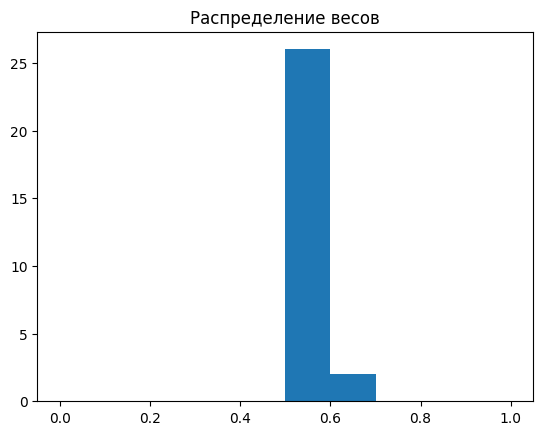

In [5]:
plt.hist(weight, bins=10, range=(0, 1))
plt.title('Распределение весов')

Text(0.5, 1.0, 'Веса')

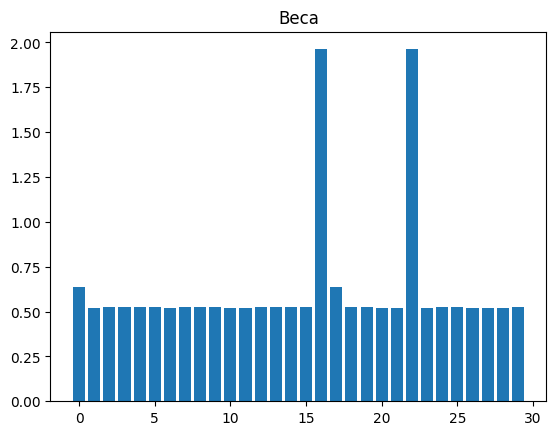

In [6]:
plt.bar(np.arange(30), weight)
plt.title('Веса')

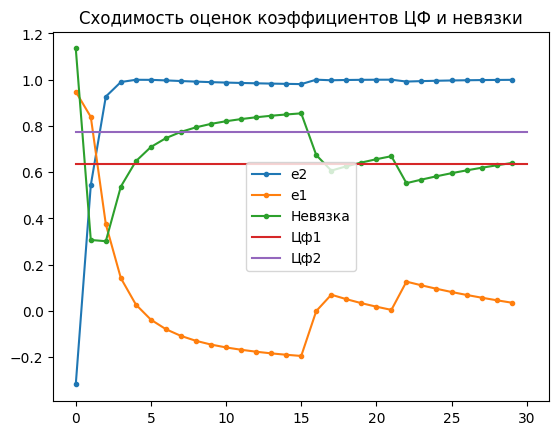

In [7]:
plt.plot(np.arange(30), np.transpose(e)[1], marker=".", label='e2')
plt.plot(np.arange(30), np.transpose(e)[0], marker=".", label='e1')
plt.plot(np.arange(30), vekt_oc, marker=".", label='Невязка')
plt.plot([0,30], [coord_nved[0][0], coord_nved[0][0]], label='Цф1')
plt.plot([0,30], [coord_nved[0][1], coord_nved[0][1]], label='Цф2')
plt.title('Сходимость оценок коэффициентов ЦФ и невязки')
plt.legend()

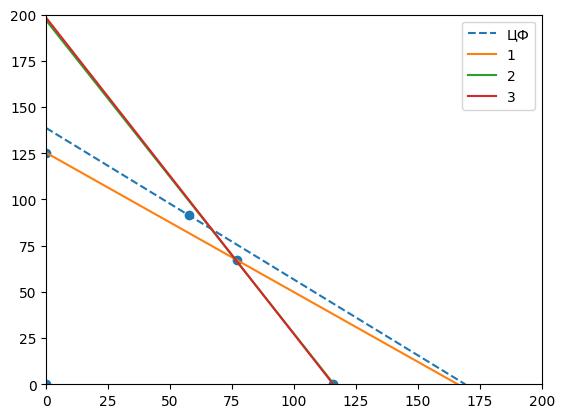

In [8]:
# Вспомогательная таблица
x = [[0, (c[0]*polygon[3] + c[1]*polygon[4])/c[0]],
     [0, polygon[0]/a[0][0]],
     [0, polygon[1]/a[1][0]],
     [0, polygon[2]/a[2][0]]]

y = [[(c[0]*polygon[3] + c[1]*polygon[4])/c[1], 0],
     [polygon[0]/a[0][1], 0],
     [polygon[1]/a[1][1], 0],
     [polygon[2]/a[2][1], 0]]

# Крайние точки
dots = [[0, 0, x[3][1], polygon[3], 77], [0, y[1][0], 0, polygon[4], 67]]

plt.plot(x[0], y[0], label='ЦФ', linestyle='--')
plt.plot(x[1], y[1], label='1')
plt.plot(x[2], y[2], label='2')
plt.plot(x[3], y[3], label='3')
plt.scatter(dots[0], dots[1])
plt.xlim(0,200)
plt.ylim(0, 200)
plt.legend()
